In [27]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month',Measurement.date)==6)

print(june_results)


SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [5]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date', 'June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)

In [9]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date', 'Dec Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# addition analysis
june_results_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==6).all()

dec_results_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12).all()

In [14]:
june_prcp_df = pd.DataFrame(june_results_prcp, columns=['date', 'June Prcp'])
dec_prcp_df = pd.DataFrame(dec_results_prcp, columns=['date', 'December Prcp'])

Text(0.5, 1.0, 'June Precipitation')

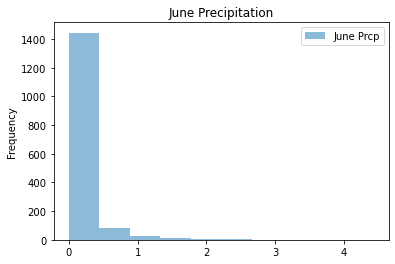

In [34]:
june_hist = june_prcp_df.plot.hist(alpha=0.5)
june_hist.set_title("June Precipitation")

Text(0.5, 1.0, 'December Precipitation')

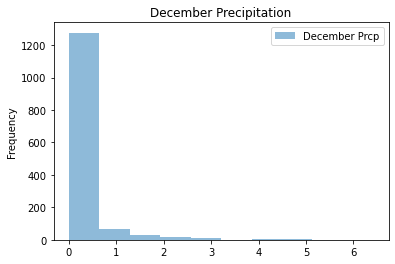

In [35]:
dec_hist = dec_prcp_df.plot.hist(alpha=0.5)
dec_hist.set_title('December Precipitation')